In [36]:
from IPython.display import display, HTML
display(HTML('<style>.container {width: 99% !important}</style>'))

# 1.0 Recebendo os dados

## 1.1 Importe das bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import kstest

## 1.2 Montagem do DataFrame principal

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/rmadan16/LinearRegression_CarPrice/master/CarPrice_Assignment.csv')

In [4]:
display(df.head())

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## 1.3 Observar o describe do DataFrame

In [5]:
df.describe(percentiles=[0.05, 0.15, 0.25, 0.45, 0.5, 0.65, 0.75, 0.9, 0.99]).T

,count,mean,std,min,5%,15%,25%,45%,50%,65%,75%,90%,99%,max
car_ID,205.0,103.000000,59.322565,1.00,11.20,31.60,52.00,92.800,103.00,133.60,154.00,184.600,202.960,205.00
symboling,205.0,0.834146,1.245307,-2.00,-1.00,0.00,0.00,0.800,1.00,1.00,2.00,3.000,3.000,3.00
wheelbase,205.0,98.756585,6.021776,86.60,93.02,93.70,94.50,96.500,97.00,99.10,102.40,107.900,115.544,120.90
carlength,205.0,174.049268,12.337289,141.10,157.14,158.98,166.30,172.000,173.20,176.72,183.10,188.800,202.480,208.10
carwidth,205.0,65.907805,2.145204,60.30,63.60,63.80,64.10,65.400,65.50,66.50,66.90,68.640,71.700,72.30
carheight,205.0,53.724878,2.443522,47.80,49.70,50.80,52.00,53.500,54.10,54.86,55.50,56.620,59.100,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,1901.00,1998.00,2145.00,2385.000,2414.00,2712.40,2935.00,3230.000,3948.000,4066.00
enginesize,205.0,126.907317,41.642693,61.00,90.00,92.00,97.00,110.000,120.00,130.00,141.00,181.000,302.160,326.00
boreratio,205.0,3.329756,0.270844,2.54,2.97,3.03,3.15,3.270,3.31,3.46,3.58,3.672,3.800,3.94
stroke,205.0,3.255415,0.313597,2.07,2.64,3.03,3.11,3.255,3.29,3.40,3.41,3.540,3.900,4.17


In [6]:
print(*df.columns, sep=', ')

car_ID, symboling, CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## 1.4 Estudo das variáveis

| Variável         | Tipo de dado | Descrição                                                            |
|------------------|--------------|----------------------------------------------------------------------|
| car_ID           | Integer      | Numero de identificacao unico do carro                               |
| symboling        | Integer      | categorizacao do risco de sinistro (-3 seguro até 3 perigoso)        |
| CarName          | String       | Nome do fabricante e do modelo do carro.                             |
| fueltype         | String       | Tipo de combustível                                                  |
| aspiration       | String       | Sobrealimentação (turbo, supercharger ou aspirado)                   |
| doornumber       | String       | Número de portas                                                     |
| carbody          | String       | Tipo de carroceria                                                   |
| drivewheel       | String       | Distribuição da tração                                               |
| enginelocation   | String       | Localização do motor                                                 |
| wheelbase        | Float        | Distância entre eixos                                                |
| carlength        | Float        | Comprimento do carro                                                 |
| carwidth         | Float        | Largura do carro                                                     |
| carheight        | Float        | Altura do carro                                                      |
| curbweight       | Float        | Peso do carro com o tanque cheio e acessórios padrão                 |
| enginetype       | String       | Tipo de motor                                                        |
| cylindernumber   | String       | Quantidade de cilindros                                              |
| enginesize       | Integer      | Tamanho do motor                                                     |
| fuelsystem       | String       | Sistema de alimentação de combustível                                |
| boreratio        | Float        | Razão entre o diâmetro do cilindro e curso de deslocamento do pistão |
| stroke           | Float        | Curso de deslocamento do pistão                                      |
| compressionratio | Float        | Razão de compressão do motor                                         |
| horsepower       | Integer      | Potência em cavalos do motor                                         |
| peakrpm          | Integer      | Rotação máxima do motor                                              |
| citympg          | Integer      | Consumo na cidade                                                    |
| highwaympg       | Integer      | Consumo na rodovia                                                   |
| price            | Float        | TARGET: Preço do carro                                               |

# 2.0 Analisando os dados

## 2.1 Analisando as variáveis numéricas

### 2.1.1 Analisando variáveis categóriacas que podem ser numéricas

In [8]:
var_cat_num = tuple('doornumber cylindernumber'.split())

val_uniq = list()

for variable in var_cat_num:
    uniq_tup = tuple(df[variable].unique())
    val_uniq.append((variable, len(uniq_tup), uniq_tup))

print(*val_uniq, sep='\n')

('doornumber', 2, ('two', 'four'))
('cylindernumber', 7, ('four', 'six', 'five', 'three', 'twelve', 'two', 'eight'))


As duas variáveis possuem valores categóricos, mas podem ser traduzidos em números.
Podemos fazer um mapping para sanar este problema antes de plotarmos os gráficos.

In [9]:
#Mudando os valores string por valores numéricos

df['doornumber'] = df['doornumber'].map({'two': 2, 'four': 4})
df['cylindernumber'] = df['cylindernumber'].map({'four': 4, 'six': 6, 'five': 5, 'three': 3,
                                                 'twelve': 12, 'two': 2, 'eight': 8})

In [10]:
df[list(var_cat_num)].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   doornumber      205 non-null    int64
 1   cylindernumber  205 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


### 2.1.2 Definindo as variáveis como numéricas ou categóricas.

In [11]:
cat = 'category'
df = df.astype({
    'car_ID': cat,
    'symboling': cat,
    'CarName': cat,
    'fueltype': cat,
    'aspiration': cat,
    'doornumber': cat,
    'carbody': cat,
    'drivewheel': cat,
    'enginelocation': cat,    
    'enginetype': cat,
    'cylindernumber': cat,    
    'fuelsystem': cat,    
})

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   car_ID            205 non-null    category
 1   symboling         205 non-null    category
 2   CarName           205 non-null    category
 3   fueltype          205 non-null    category
 4   aspiration        205 non-null    category
 5   doornumber        205 non-null    category
 6   carbody           205 non-null    category
 7   drivewheel        205 non-null    category
 8   enginelocation    205 non-null    category
 9   wheelbase         205 non-null    float64 
 10  carlength         205 non-null    float64 
 11  carwidth          205 non-null    float64 
 12  carheight         205 non-null    float64 
 13  curbweight        205 non-null    int64   
 14  enginetype        205 non-null    category
 15  cylindernumber    205 non-null    category
 16  enginesize        205 non-

### 2.1.3 Plotando histogramas das variáveis numéricas.

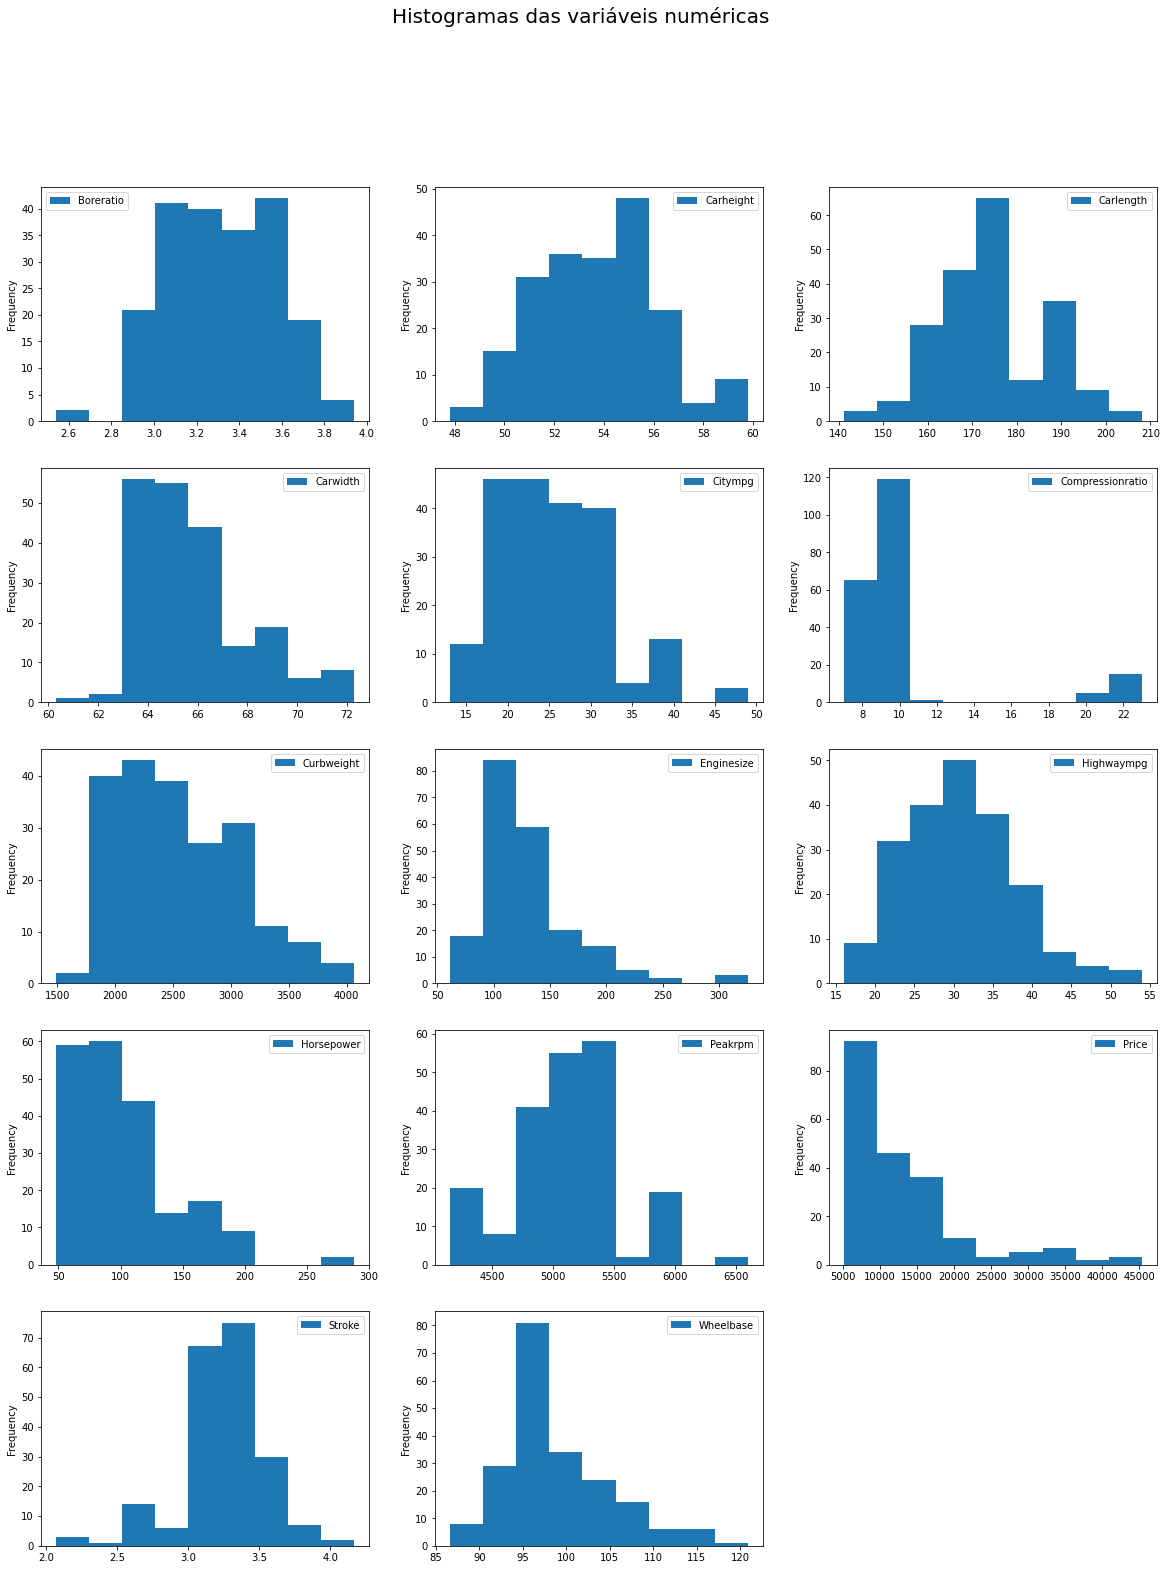

In [17]:
numeric_vars = sorted(tuple(df.select_dtypes(include='number').columns))[::-1]

nv_index = len(numeric_vars) - 1 

ncols = 3
nrows = int(np.ceil(len(numeric_vars)/(1.0 * ncols)))

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 25))

fig.suptitle('Histogramas das variáveis numéricas', fontsize=20)

for lines in axes: #itera nas linhas
    for cols in lines: #itera nas colunas dentro das linhas
        if nv_index >= 0:  #verifica o indice a ser usado

            linha = np.where(axes == lines)[0][0] #pega o index da linha
            coluna = np.where(lines == cols)[0][0] #pega o index da coluna

            df[numeric_vars[nv_index]].plot.hist(bins=9, 
            label=numeric_vars[nv_index].replace('_', ' ').title(), 
            subplots=True, legend=True, ax=axes[linha, coluna])
      
            nv_index -= 1

        else:
            plt.axis('off')


plt.show()

### 2.1.4 Boxplot das variáveis numéricas

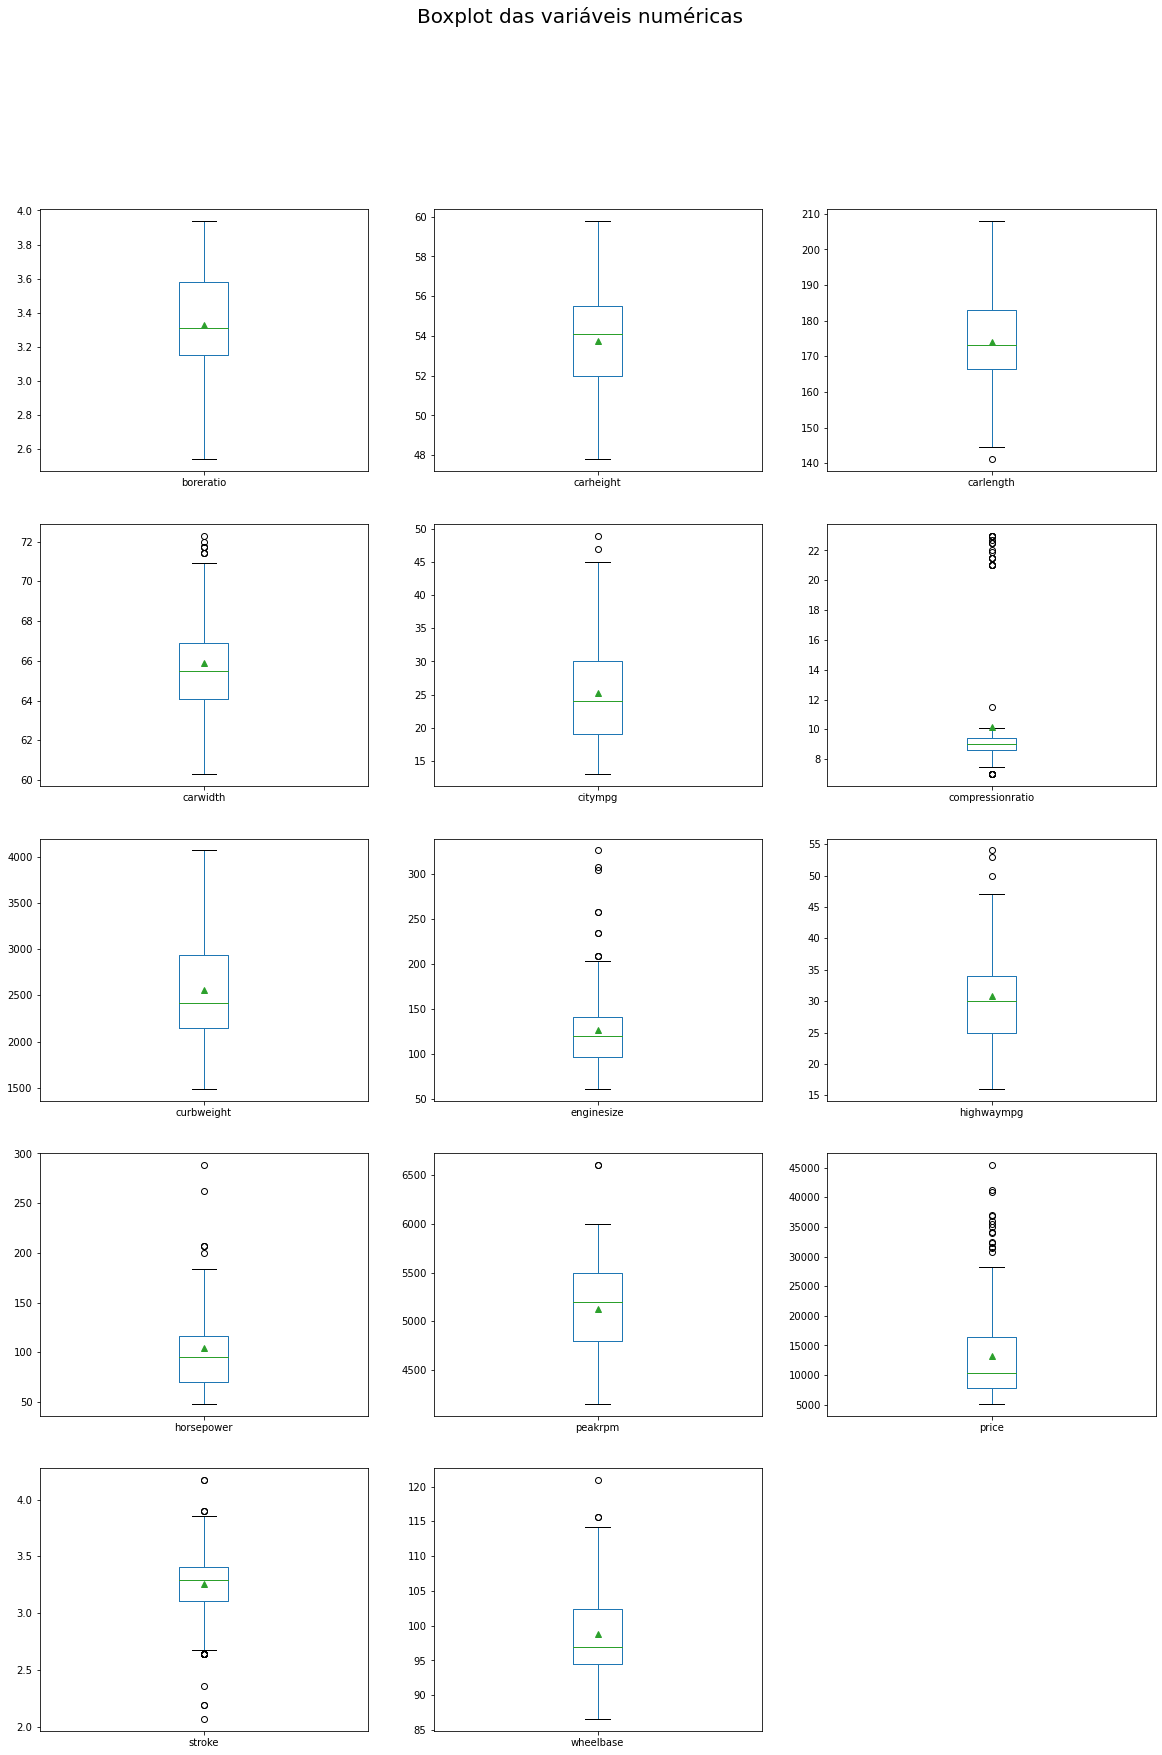

In [14]:
nv_index = len(numeric_vars) - 1 

ncols = 3
nrows = int(np.ceil(len(numeric_vars)/(1.0 * ncols)))

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 28))

fig.suptitle('Boxplot das variáveis numéricas', fontsize=20)

for lines in axes: #itera nas linhas
    for cols in lines: #itera nas colunas dentro das linhas
        if nv_index >= 0:  #verifica o indice a ser usado
            
            linha = np.where(axes == lines)[0][0] #pega o index da linha
            coluna = np.where(lines == cols)[0][0] #pega o index da coluna

            df.boxplot(column=numeric_vars[nv_index], grid=False,
            vert=True, showmeans=True, ax=axes[linha, coluna])
            
            nv_index -= 1
        else:
            plt.axis('off')

plt.show()

### 2.1.5 Executando o teste de normalidade pelo método Kolmogorov-Smirnov com as variáveis numéricas

In [15]:
nrm_test = list()

for var in numeric_vars:
    ks, pvalue = kstest(df[var], cdf = 'norm')
    nrm_test.append({
        'Variavel': var,
        'Estatistica KS': ks,
        'p-valor': pvalue
    })
    
print(*sorted(nrm_test, key=lambda x: x['Estatistica KS']), sep='\n')

{'Variavel': 'stroke', 'Estatistica KS': 0.9808598328088434, 'p-valor': 0.0}
{'Variavel': 'boreratio', 'Estatistica KS': 0.9944573765569173, 'p-valor': 0.0}
{'Variavel': 'compressionratio', 'Estatistica KS': 0.9999999999987201, 'p-valor': 0.0}
{'Variavel': 'wheelbase', 'Estatistica KS': 1.0, 'p-valor': 0.0}
{'Variavel': 'price', 'Estatistica KS': 1.0, 'p-valor': 0.0}
{'Variavel': 'peakrpm', 'Estatistica KS': 1.0, 'p-valor': 0.0}
{'Variavel': 'horsepower', 'Estatistica KS': 1.0, 'p-valor': 0.0}
{'Variavel': 'highwaympg', 'Estatistica KS': 1.0, 'p-valor': 0.0}
{'Variavel': 'enginesize', 'Estatistica KS': 1.0, 'p-valor': 0.0}
{'Variavel': 'curbweight', 'Estatistica KS': 1.0, 'p-valor': 0.0}
{'Variavel': 'citympg', 'Estatistica KS': 1.0, 'p-valor': 0.0}
{'Variavel': 'carwidth', 'Estatistica KS': 1.0, 'p-valor': 0.0}
{'Variavel': 'carlength', 'Estatistica KS': 1.0, 'p-valor': 0.0}
{'Variavel': 'carheight', 'Estatistica KS': 1.0, 'p-valor': 0.0}


### 2.1.6 Resultados da exploratória:

- Não existem distribuições que sequer possam chegar perto de serem normais nas variáveis numéricas. Visto os histogramas e os testes Kolmogorov.
- Existe presença de outliers em algumas variáveis, entretanto estes dizem respeito à características técnicas dos veículos registrados e são aceitáveis, eliminando a possibilidade de erro de digitação ou corrompimento dos dados.

## 2.2 Analisando variáveis categóricas

### 2.2.1 Criando um array com as variáveis categóricas

In [22]:
category_variables = sorted(tuple(df.select_dtypes(include='category').columns))[::-1]
print(category_variables)

['symboling', 'fueltype', 'fuelsystem', 'enginetype', 'enginelocation', 'drivewheel', 'doornumber', 'cylindernumber', 'carbody', 'car_ID', 'aspiration', 'CarName']


### 2.2.2 Verificando a quantidade e as categorias possíveis em cada variável.

In [35]:
cat_info = list()
for cat in category_variables:
    cat_info.append({
        'Variavel': cat,
        'Qtd': len(df[cat].unique()),
        'Cats': tuple(df[cat].unique())[:15]
    })

print(*sorted(cat_info, key=lambda x: x['Qtd'], reverse=True), sep='\n')

{'Variavel': 'car_ID', 'Qtd': 205, 'Cats': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15)}
{'Variavel': 'CarName', 'Qtd': 147, 'Cats': ('alfa-romero giulia', 'alfa-romero stelvio', 'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls', 'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)', 'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5')}
{'Variavel': 'fuelsystem', 'Qtd': 8, 'Cats': ('mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi')}
{'Variavel': 'enginetype', 'Qtd': 7, 'Cats': ('dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv')}
{'Variavel': 'cylindernumber', 'Qtd': 7, 'Cats': (4, 6, 5, 3, 12, 2, 8)}
{'Variavel': 'symboling', 'Qtd': 6, 'Cats': (3, 1, 2, 0, -1, -2)}
{'Variavel': 'carbody', 'Qtd': 5, 'Cats': ('convertible', 'hatchback', 'sedan', 'wagon', 'hardtop')}
{'Variavel': 'drivewheel', 'Qtd': 3, 'Cats': ('rwd', 'fwd', '4wd')}
{'Variavel': 'fueltype', 'Qtd': 2, 'Cats': ('gas', 'diesel')}
{'Variavel': 'enginelocation', 'Qtd': 2, 'Cats': ('fr

- A variável car_ID é apenas uma identificação do registro do carro no banco de dados, podendo ser desprezada.
- CarName possui 147 registros distintos que consistem em montadora + modelo. Sendo extremamente interessante separá-los para que a análise de montadora e modelo possa ser feita separadamente pelo modelo preditivo de preço.
- Demais variáveis dizem respeito à características técnicas dos carros.

### 2.2.3 Analisando variável CarName

In [41]:
print(*sorted(tuple(df['CarName'].unique())), sep=', ')

Nissan versa, alfa-romero Quadrifoglio, alfa-romero giulia, alfa-romero stelvio, audi 100 ls, audi 100ls, audi 4000, audi 5000, audi 5000s (diesel), audi fox, bmw 320i, bmw x1, bmw x3, bmw x4, bmw x5, bmw z4, buick century, buick century luxus (sw), buick century special, buick electra 225 custom, buick opel isuzu deluxe, buick regal sport coupe (turbo), buick skyhawk, buick skylark, chevrolet impala, chevrolet monte carlo, chevrolet vega 2300, dodge challenger se, dodge colt (sw), dodge colt hardtop, dodge coronet custom, dodge coronet custom (sw), dodge d200, dodge dart custom, dodge monaco (sw), dodge rampage, honda accord, honda accord cvcc, honda accord lx, honda civic, honda civic (auto), honda civic 1300, honda civic 1500 gl, honda civic cvcc, honda prelude, isuzu D-Max , isuzu D-Max V-Cross, isuzu MU-X, jaguar xf, jaguar xj, jaguar xk, maxda glc deluxe, maxda rx3, mazda 626, mazda glc, mazda glc 4, mazda glc custom, mazda glc custom l, mazda glc deluxe, mazda rx-4, mazda rx-7 g

# 3.0 Processamento dos dados

## 3.1 Criando um DataFrame vazio para receber dados processados

In [42]:
dfProc = pd.DataFrame()

## 3.2 Processando variáveis categóricas

### 3.2.1 CarName

- Se faz necessário separar o nome das montadoras dos modelos criando duas variáveis distintas a partir de uma.

In [79]:
#Definindo uma função para pegar o nome das montadoras.
def brand_getter(car_name):
    return car_name.split()[0].title()


#Definindo uma função para pegar o modelo dos veículos.
def model_getter(car_name):
    return '' + ' '.join(car_name.split()[1:]).title()

#Criando um DataFrame para receber apenas as novas features.
CarNames = pd.DataFrame()

#Preenchendo as duas colunas do DataFrame criado
CarNames['brand'] = df['CarName'].apply(brand_getter)
CarNames['model'] = df['CarName'].apply(model_getter)

#Corrigindo nomes de montadoras digitados errados
CarNames['brand'].replace({
    'Alfa-Romero': 'Alfa-Romeo',
    'Maxda': 'Mazda',
    'Vokswagen': 'Volkswagen',
    'Porcshce': 'Porsche',
    'Toyouta' : 'Toyota',
    'Vw': 'Volkswagen'
}, inplace=True)

#Corrigindo nome de Modelos
CarNames['model'].replace({
    '100 Ls': '100Ls'
}, inplace=True)

